In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, MaxAbsScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("tested.csv")

In [3]:
df.drop(["PassengerId","Name","Ticket","Cabin","Embarked","Sex"],axis=1,inplace=True)

In [4]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,34.5,0,0,7.8292
1,1,3,47.0,1,0,7.0000
2,0,2,62.0,0,0,9.6875
3,0,3,27.0,0,0,8.6625
4,1,3,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,0,3,NaN,0,0,8.0500
414,1,1,39.0,0,0,108.9000
415,0,3,38.5,0,0,7.2500
416,0,3,NaN,0,0,8.0500


In [5]:
df.fillna(0,inplace=True)

In [6]:
df.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [7]:
n=0
d=0
x=df["Fare"]
y=df["Age"]

In [8]:
for i in range(len(x)):
    n+=(x[i]-x.mean()*y[i]-y.mean())
    d+=(x[i]-x.mean())**2
    

In [9]:
m=n/d

In [10]:
c=y.mean()-m*x.mean()

In [11]:
c

33.66769471887182

In [12]:
m

-0.27076271071992036

<Axes: ylabel='Age'>

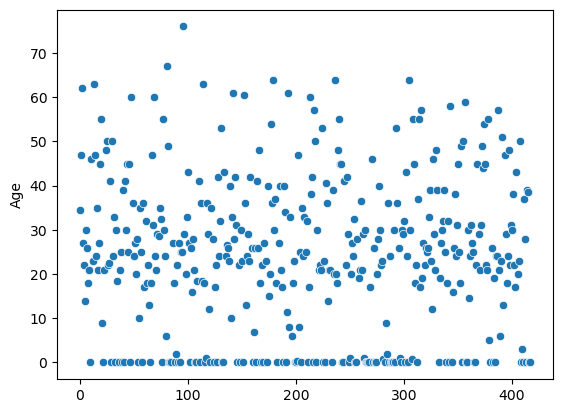

In [13]:
sns.scatterplot(y)

In [14]:
s=StandardScaler()

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21)

In [16]:
x_train_s=s.fit_transform(x_train)
x_test_s=s.fit_transform(x_test)

In [17]:
x_train_s

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [18]:
k=s.get_feature_names_out()

In [44]:
x_train_s=pd.DataFrame(x_train_s,columns=c)

ValueError: Shape of passed values is (1, 292), indices imply (1, 126)

In [19]:
print(df.shape)

(418, 6)


In [20]:
print(df.head())

   Survived  Pclass   Age  SibSp  Parch     Fare
0         0       3  34.5      0      0   7.8292
1         1       3  47.0      1      0   7.0000
2         0       2  62.0      0      0   9.6875
3         0       3  27.0      0      0   8.6625
4         1       3  22.0      1      1  12.2875


In [21]:
df = df.dropna(subset=['Age', 'Fare']) 

In [22]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,34.5,0,0,7.8292
1,1,3,47.0,1,0,7.0000
2,0,2,62.0,0,0,9.6875
3,0,3,27.0,0,0,8.6625
4,1,3,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,0,3,0.0,0,0,8.0500
414,1,1,39.0,0,0,108.9000
415,0,3,38.5,0,0,7.2500
416,0,3,0.0,0,0,8.0500


In [23]:
X = df[['Fare']]
y = df[['Age']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [26]:
y_pred = model.predict(X_test)


In [27]:
y_pred

array([[20.08094952],
       [44.53571533],
       [20.14334797],
       [20.16081667],
       [20.6745136 ],
       [22.32992969],
       [20.1643152 ],
       [22.32992969],
       [20.77236463],
       [20.17929178],
       [22.1082762 ],
       [23.93541982],
       [20.23520837],
       [32.26240223],
       [20.17929178],
       [25.98371372],
       [20.14634329],
       [25.2054344 ],
       [22.70434436],
       [20.47283289],
       [20.77236463],
       [25.42858555],
       [20.86521947],
       [20.77236463],
       [21.04143999],
       [20.08743139],
       [25.85741915],
       [22.39582667],
       [20.08094952],
       [20.77236463],
       [21.91358057],
       [23.96986597],
       [37.37241374],
       [20.17929178],
       [20.47283289],
       [20.47283289],
       [20.14334797],
       [21.01747745],
       [22.32992969],
       [44.55518489],
       [20.14334797],
       [22.02440731],
       [21.01747745],
       [23.95938236],
       [22.53610337],
       [20

In [28]:
y_pred=m*x+c

In [29]:
mean=mean_squared_error(y,y_pred)

In [40]:
mean

729.6688166061505

In [32]:
r2sqr=r2_score(y,y_pred)

In [38]:
r2sqr

-1.361348142060078

In [34]:
abs=mean_absolute_error(y,y_pred)

In [36]:
abs

19.67522107836032